In [51]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score


In [2]:
data=pd.read_csv("IMDb Movies India.csv", encoding='latin-1')
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [4]:
data["Actor"]=data["Actor 1"]+","+data["Actor 2"]+","+data["Actor 3"]
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,"Manmauji,Birbal,Rajendra Bhatia"
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal,Vivek Ghamande,Arvind Jangid"
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,"Sayani Gupta,Plabita Borthakur,Roy Angana"
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik,Ishita Raj,Siddhant Kapoor"
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,"Rajat Kapoor,Rituparna Sengupta,Antara Mali"
...,...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,"Naseeruddin Shah,Sumeet Saigal,Suparna Anand"
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,"Akshay Kumar,Twinkle Khanna,Aruna Irani"
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape

(15509, 11)

In [6]:
data.duplicated().sum()

6

In [7]:
data=data.drop_duplicates()

In [8]:
data.isnull().sum()

Name           0
Year         527
Duration    8264
Genre       1876
Rating      7584
Votes       7583
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
Actor       3140
dtype: int64

(array([ 179., 1440., 3357., 2771.,  172.]),
 array([ 1.1 ,  2.88,  4.66,  6.44,  8.22, 10.  ]),
 <BarContainer object of 5 artists>)

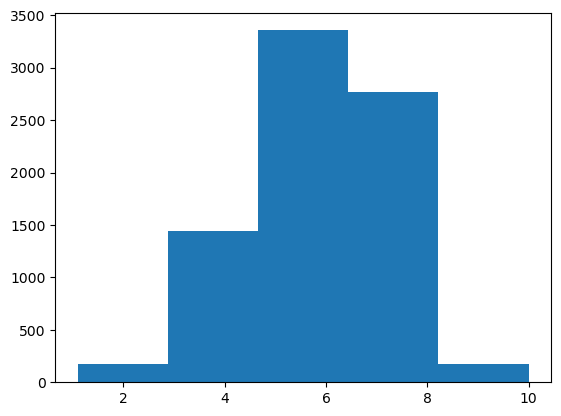

In [9]:
plt.hist(data["Rating"],bins=5)

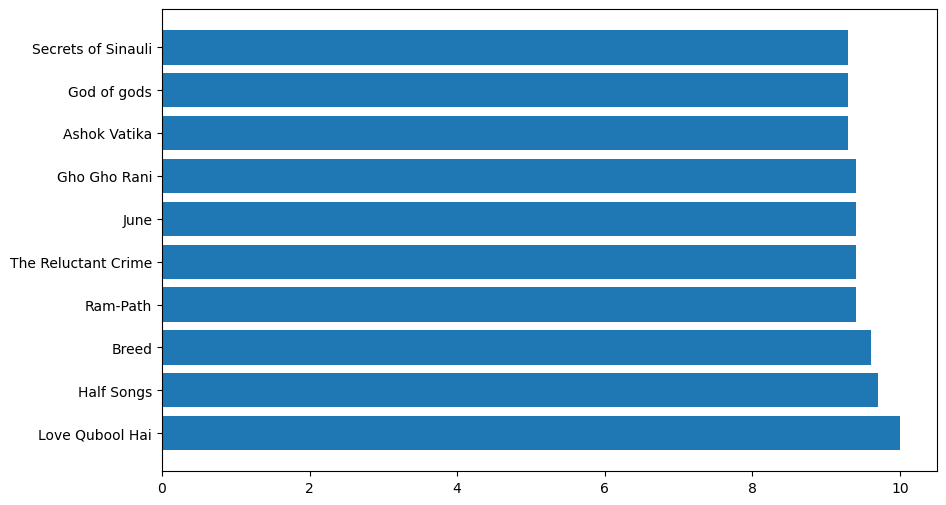

In [10]:
data_sorted=data.sort_values(by="Rating",ascending=False)
top_ten=data_sorted.head(10)
plt.figure(figsize=(10,6))
bars = plt.barh(top_ten['Name'], top_ten['Rating'])


In [11]:
def TopTen(data, column):
    data[column].value_counts().sort_values(ascending=False)[:10].plot(kind="bar")
    plt.title("Top Ten {}".format(column))
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

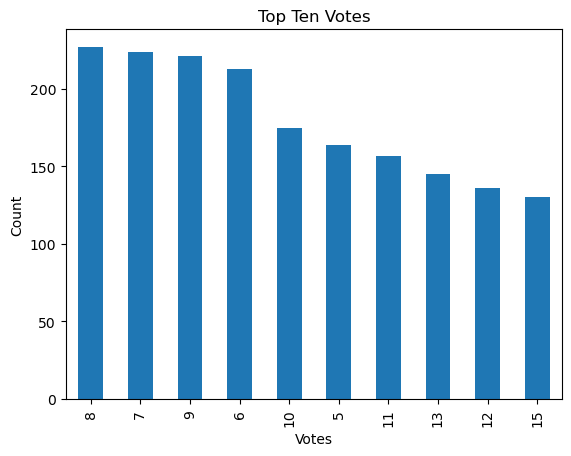

In [12]:
TopTen(data, "Votes")

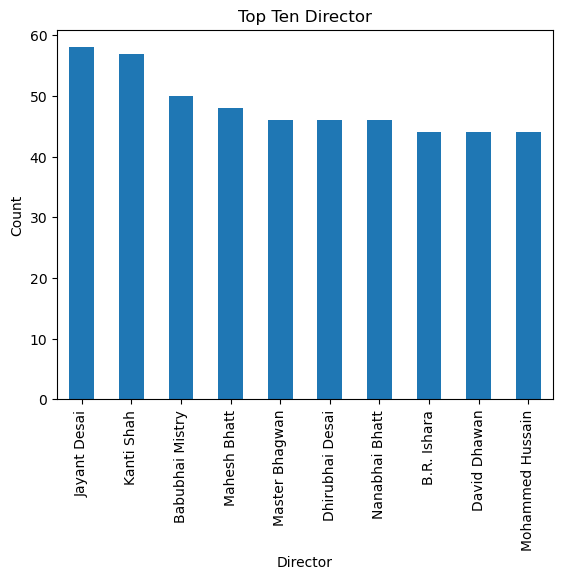

In [13]:
TopTen(data,"Director")

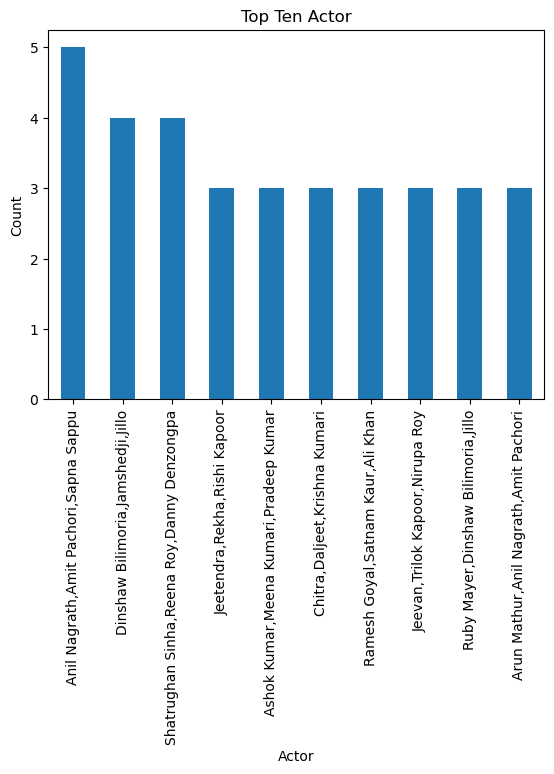

In [14]:
TopTen(data,"Actor")

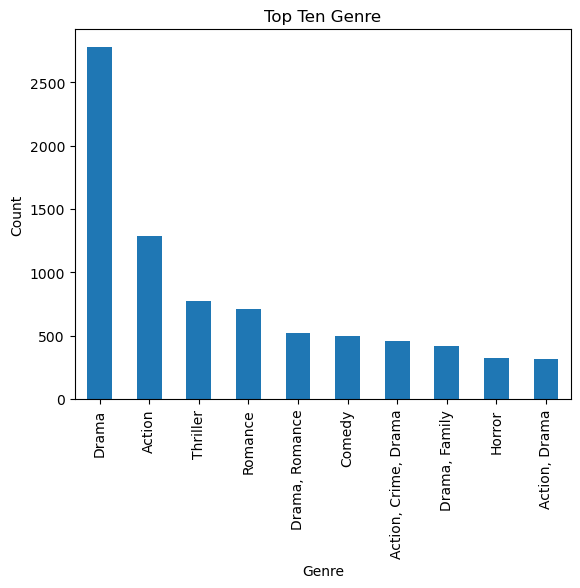

In [15]:
TopTen(data,"Genre")

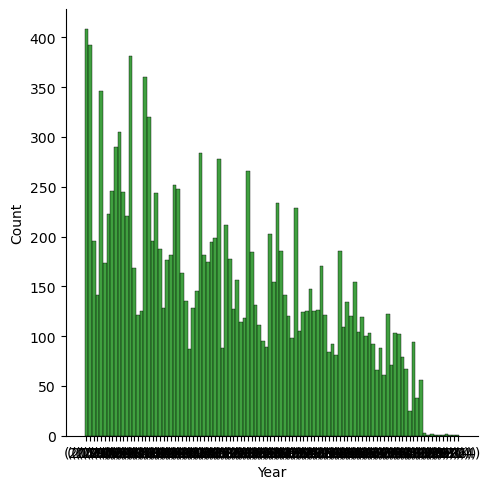

In [16]:
sns.displot(data["Year"],color="g")

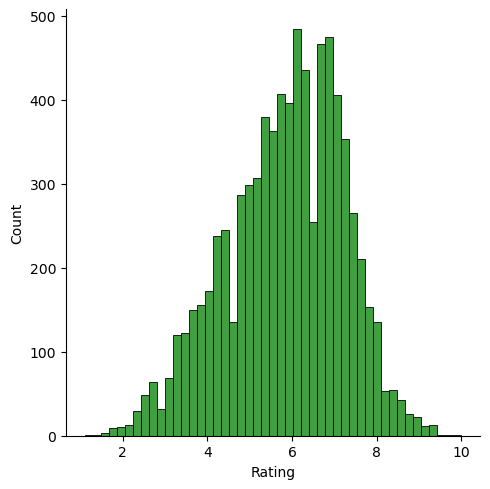

In [17]:
sns.displot(data["Rating"],color="g")

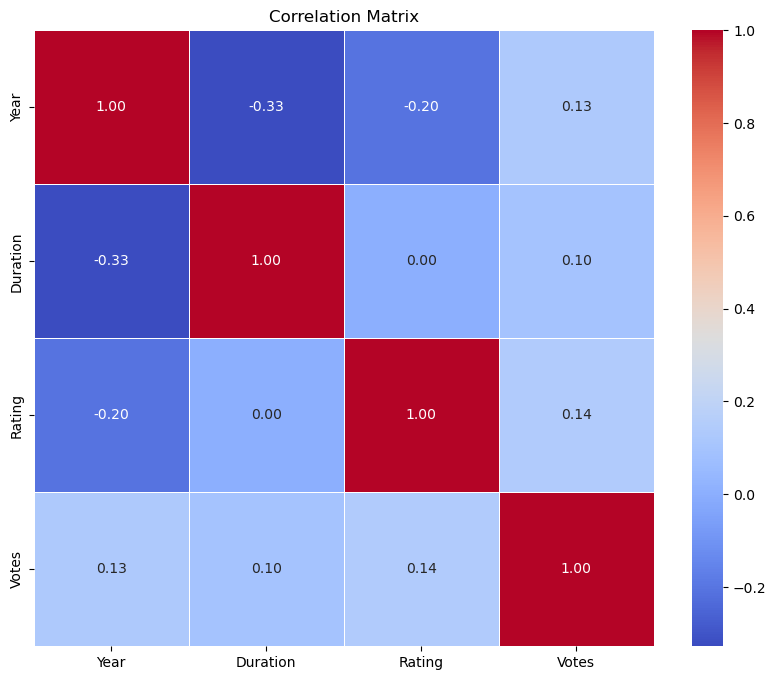

In [50]:
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [19]:
data.dropna(subset=['Rating',"Director", "Actor 1", "Actor 2", "Actor 3","Duration","Genre"],inplace=True)

In [20]:
data['Year']=data["Year"].str.strip('()').astype(int)

In [21]:
data["Duration"]=data["Duration"].str.replace('min','').astype(int)

In [22]:
data['Votes']=data['Votes'].str.replace(",","").astype(int)

In [23]:
data.drop([], axis=1, inplace=True)

In [24]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal,Vivek Ghamande,Arvind Jangid"
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik,Ishita Raj,Siddhant Kapoor"
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor"
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma"
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave,Muntazir Ahmad,Kiran Bhatia"
...,...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,"Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana"
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,"Karisma Kapoor,Rekha,Manoj Bajpayee"
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,"Chiranjeevi,Jayamalini,Rajinikanth"
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,"Akshay Kumar,Twinkle Khanna,Aruna Irani"


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int32  
 2   Duration  5659 non-null   int32  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int32  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
 10  Actor     5659 non-null   object 
dtypes: float64(1), int32(3), object(7)
memory usage: 464.2+ KB


In [26]:
data.describe

<bound method NDFrame.describe of                                      Name  Year  Duration  \
1      #Gadhvi (He thought he was Gandhi)  2019       109   
3                                 #Yaaram  2019       110   
5                    ...Aur Pyaar Ho Gaya  1997       147   
6                               ...Yahaan  2005       142   
8                      ?: A Question Mark  2012        82   
...                                   ...   ...       ...   
15493                              Zubaan  2015       115   
15494                            Zubeidaa  2001       153   
15503                     Zulm Ki Zanjeer  1989       125   
15505                               Zulmi  1999       129   
15508                        Zulm-O-Sitam  1998       130   

                           Genre  Rating  Votes         Director  \
1                          Drama     7.0      8    Gaurav Bakshi   
3                Comedy, Romance     4.4     35       Ovais Khan   
5         Comedy, Drama, Musi

In [27]:
data.drop(["Name","Actor 1", "Actor 2", "Actor 3"],axis=1,inplace=True)

In [29]:
x=data.drop("Rating",axis=1)
y=data["Rating"]

In [30]:
x

,Year,Duration,Genre,Votes,Director,Actor
1,2019,109,Drama,8,Gaurav Bakshi,"Rasika Dugal,Vivek Ghamande,Arvind Jangid"
3,2019,110,"Comedy, Romance",35,Ovais Khan,"Prateik,Ishita Raj,Siddhant Kapoor"
5,1997,147,"Comedy, Drama, Musical",827,Rahul Rawail,"Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor"
6,2005,142,"Drama, Romance, War",1086,Shoojit Sircar,"Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma"
8,2012,82,"Horror, Mystery, Thriller",326,Allyson Patel,"Yash Dave,Muntazir Ahmad,Kiran Bhatia"
...,...,...,...,...,...,...
15493,2015,115,Drama,408,Mozez Singh,"Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana"
15494,2001,153,"Biography, Drama, History",1496,Shyam Benegal,"Karisma Kapoor,Rekha,Manoj Bajpayee"
15503,1989,125,"Action, Crime, Drama",44,S.P. Muthuraman,"Chiranjeevi,Jayamalini,Rajinikanth"
15505,1999,129,"Action, Drama",655,Kuku Kohli,"Akshay Kumar,Twinkle Khanna,Aruna Irani"


In [31]:
y

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 5659, dtype: float64

In [32]:
x = data[['Year', 'Duration', 'Votes']]
y = data['Genre']

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(x)

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [34]:
x_train.shape

(4527, 3)

In [35]:
x_test.shape

(1132, 3)

In [36]:
y_train.shape

(4527,)

In [37]:
y_test.shape

(1132,)

In [68]:
lr=LogisticRegression()
lr.fit(x_train, y_train)
lr_test_score = lr.score(x_test, y_test)
lr_train_score = lr.score(x_train, y_train)

knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
knn_test_score = knn.score(x_test, y_test)
knn_train_score = knn.score(x_train, y_train)

rf = RandomForestClassifier(random_state=1, max_depth=2, criterion="entropy", n_estimators=200)
rf.fit(x_train, y_train)
rf_test_score = rf.score(x_test, y_test)
rf_train_score = rf.score(x_train, y_train)

dt=DecisionTreeClassifier(max_depth = 7)
dt.fit(x_train, y_train)
dt_test_score = dt.score(x_test, y_test)
dt_train_score = dt.score(x_train, y_train)

In [69]:
train_score = lr.score(x_train, y_train)
test_score = lr.score(x_test, y_test)

print(f"Training of lr : {train_score}")
print(f"Testing of lr : {test_score}")

train_score = knn.score(x_train, y_train)
test_score = knn.score(x_test, y_test)

print(f"Training of knn  : {train_score}")
print(f"Testing of knn : {test_score}")

train_score = rf.score(x_train, y_train)
test_score = rf.score(x_test, y_test)

print(f"Training of rf  : {train_score}")
print(f"Testing of rf : {test_score}")

train_score = dt.score(x_train, y_train)
test_score = dt.score(x_test, y_test)

print(f"Training of dt  : {train_score}")
print(f"Testing of dt : {test_score}")

Training of lr : 0.15308151093439365
Testing of lr : 0.15901060070671377
Training of knn  : 0.24210293792798762
Testing of knn : 0.11925795053003534
Training of rf  : 0.15065164568146674
Testing of rf : 0.15812720848056538
Training of dt  : 0.21117738016346366
Testing of dt : 0.14487632508833923


In [67]:
lr_pred=lr.predict(x_test)
lr_pred
print("accuracy of lr: ",accuracy_score(y_test,lr_pred))

knn_pred=knn.predict(x_test)
knn_pred
print("accuracy of knn: ",accuracy_score(y_test,knn_pred))

rf_pred=rf.predict(x_test)
rf_pred
print("accuracy of rf: ",accuracy_score(y_test,rf_pred))

dt_pred=dt.predict(x_test)
dt_pred
print("accuracy of dt: ",accuracy_score(y_test,dt_pred))


accuracy of lr:  0.15901060070671377
accuracy of knn:  0.11925795053003534
accuracy of rf:  0.15812720848056538
accuracy of dt:  0.1687279151943463
